##### CSCI 303
# Introduction to Data Science
<p/>
### 6 - Machine Learning Beginnings

![a fitted curve](fit.png) 

## Looking Ahead
---
### Tentative Plan
- We've learned just some basics of Python
  - We left out a lot!
    - Functions, modules, classes
    - NumPy, pandas, matplotlib
  - We will learn *some* of these in context of rest of class
- Next task is to start on some machine learning
  - Provide context for learning additional technologies
  - Introduce basic concepts we'll build on later

## This Lecture
---
- Introduce basic supervised learning concepts
- Introduce NumPy & matplotlib
- Introduce linear regression
- Explore linear regression using NumPy and matplotlib

## Machine (or Statistical) Learning
---
- Learning structure and relationships in data
- Supervised learning
  - Goal is predicting outputs based on inputs
  - Learn from labeled exemplar data
  - E.g., regression, classification
- Unsupervised learning
  - Goal is reveal hidden structure in the data
  - Inputs but no labeled outputs
  - E.g., clustering

## Regression
---
Motivation: consider a relatively simple prediction problem\*:
  - Inputs: advertising dollars spent (in various media)
  - Outputs: total sales
  - Problem: predict sales for new ad buy

\*This example comes from D. James, et al., *An Introduction to Statistical Learning*

## Terms
---
The *inputs* in this case are numerical values:

- Advertising dollars (for some given week)
  - TV
  - Radio
  - Newspaper

Inputs are often denoted as $X$, and go by various names:

- predictors
- independent variables
- features

The *outputs* are also numerical values in a regression problem:

- Total sales (for some given week)

The outputs are typically labeled $Y$, and are called:

- response variables
- dependent variables
- targets

## The Model
---
In regression, we typically assume the existence of some hidden function $f$, such that

$$ Y = f(X) + \epsilon $$

where $\epsilon$ represents a random error or *noise* term with zero mean.

## Prediction
---
Given some data (e.g., historical sales data) that includes both the inputs and the outputs, can we make an informed guess of the output for some (previously unseen) input?

We write

$$ \hat Y = \hat f (X) $$

where the "hat" on $\hat Y$ and $\hat f$ means these are approximate.

Essentially, since $\epsilon$ has zero mean, the best approximation we can obtain for some unobserved output $y'$ associated with inputs $x'$ is $f(x')$.  However, since $f$ itself is unavailable, we'll use an *estimate* of $f$.


## Parametric Approximation
---
- There are different kinds of approximation techniques for estimating $f$.
- We'll study these in more depth later
- For now, focus on *parametric* approximation, in which:
  - $\hat f(X) = f(X, \theta)$
  - $\theta$ is a vector of *parameters* of some model of $f$
- More specifically, we'll look at *linear regression*:
  - $\hat f(X) = f(X, \theta) = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_k X_k$

## Notation for Linear Regression
---

Let's rewrite a bit: given an input (which we assume to be a vector of inputs: $\mathbf{x}$)

- let $\phi$ represent the vector $(1, x_1, x_2, ..., x_k)$
- instead of $\theta$ for our parameter vector, we'll use $\mathbf{w}$
- Then 

$$\begin{align}
    \hat f(\mathbf{x}) & = 1 w_0 + x_1 w_1 + ... + x_k w_k \\
                   & = \phi \cdot \mathbf{w}
  \end{align}$$

## Some Linear Algebra
---
Now suppose we have $n$ examples.

We stack all of our $\phi$ vectors as rows in the matrix $\Phi$:

$$ \Phi = \left[ \begin{array}{cccc} \phi_{00} & \phi_{01} & \dots & \phi_{0k} \\
                                     \phi_{10} & \phi_{11} & \dots & \phi_{1k} \\
                                     \vdots & \ddots & & \vdots \\
                                     \phi_{n0} & \phi_{n1} & \dots & \phi_{nk} \end{array}
          \right] $$
          
$\Phi$ is often called the *design matrix*.
                                     


We similarly take all of our $n$ outputs $y_i$ to make a vector $\mathbf{y}$:

$$ \mathbf{y} = \left[ \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right] $$

$\mathbf{y}$ is the *target vector*.

Then we are interested in finding vector $\mathbf{w}$ which as close as possible satisfies the equation

$$ \Phi \mathbf{w} = \mathbf{y} $$

For the "ordinary least squares" (**OLS**) solution, we find

$$ \mathbf{w} = \arg \min_{\mathbf{w'}} \| \mathbf{y} - \Phi \mathbf{w'} \| $$

which, it turns out, can be solved for using linear algebra to obtain

$$ \mathbf{w} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y} $$

$\mathbf{w}$ is the *weight vector*.

## Linear Algebra in Python: NumPy
---
- Like MATLAB, NumPy provides wrappers onto specialized linear algebra libraries written in C/Fortran
- NumPy adds to Python a basic type: `ndarray`
  - Flexible, multidimensional array type
  - Supports scalar and vector/matrix math operations
  - Easily converts to/from Python sequence types
    - However, `ndarray` imposes container typing
- See the docs (Help menu in Jupyter notebook) for more info

## OLS Example Using NumPy and matplotlib
---
For the rest of this lecture, we're going to:

- Generate (simulate) a regression problem (NumPy)
- Perform OLS regression on the problem (NumPy)
- Plot results (matplotlib)

## Step 1: Generate a Problem
---
First, we need a function to be our "unknown" function to learn.

We're going to stick with polynomials in one variable for this example.

How about:

$$ f(x) = 3 + 0.5 n - n^2 + 0.15 n^3 $$

Let's visualize this function.  

First, we need some points along the curve.

To do that, we need the NumPy library *imported* into Python:

In [1]:
import numpy as np    # use np as an alias by convention

Now we can use NumPy's `ndarray` type and generate some inputs:

In [2]:
X = np.arange(-5, 5, 0.1)
X

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

Next, compute f(x) for each input:

In [3]:
Y = 3 + 0.5 * X - X**2 + 0.15 * X**3
Y

array([-4.325000e+01, -4.110735e+01, -3.902880e+01, -3.701345e+01,
       -3.506040e+01, -3.316875e+01, -3.133760e+01, -2.956605e+01,
       -2.785320e+01, -2.619815e+01, -2.460000e+01, -2.305785e+01,
       -2.157080e+01, -2.013795e+01, -1.875840e+01, -1.743125e+01,
       -1.615560e+01, -1.493055e+01, -1.375520e+01, -1.262865e+01,
       -1.155000e+01, -1.051835e+01, -9.532800e+00, -8.592450e+00,
       -7.696400e+00, -6.843750e+00, -6.033600e+00, -5.265050e+00,
       -4.537200e+00, -3.849150e+00, -3.200000e+00, -2.588850e+00,
       -2.014800e+00, -1.476950e+00, -9.744000e-01, -5.062500e-01,
       -7.160000e-02,  3.304500e-01,  7.008000e-01,  1.040350e+00,
        1.350000e+00,  1.630650e+00,  1.883200e+00,  2.108550e+00,
        2.307600e+00,  2.481250e+00,  2.630400e+00,  2.755950e+00,
        2.858800e+00,  2.939850e+00,  3.000000e+00,  3.040150e+00,
        3.061200e+00,  3.064050e+00,  3.049600e+00,  3.018750e+00,
        2.972400e+00,  2.911450e+00,  2.836800e+00,  2.749350e

Note that we could simply do the math on the `ndarray` object.

By default, all math operations on ndarrays is element-wise.

Vector operations require other notation (as we'll see).

Let's plot our function:

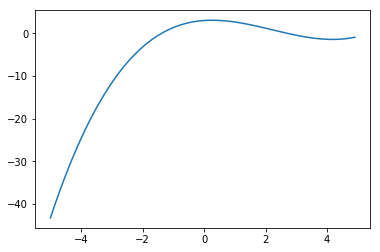

In [14]:
import matplotlib.pyplot as plt  # another convention
plt.plot(X, Y)
plt.show()

Great!  Now, our model is

$$ Y = f(X) + \epsilon $$

and we assume we only have some data to guide us.

Let's generate some random inputs, then compute Y by adding random noise.

First, we'll make use of `np.random.random(n)`, which generates an array of $n$ points in the interval [0, 1).

We have to scale and translate the points into the input range of interest - [-5, 5)

In [5]:
trainX = np.random.random(20) * 10 - 5
trainX

array([-2.80992943, -4.69547541, -1.2773986 , -4.65801897,  3.92383627,
        3.74417216,  3.82218071,  1.99323619, -4.68368573,  2.34762713,
        4.66302046,  4.29883475, -1.93022982, -2.45853175,  0.17087087,
       -0.77517408,  0.76775316, -4.25844334, -2.27386372,  1.68964476])

Next, compute $f(x)$ plus some zero mean Gaussian noise on each sample input:

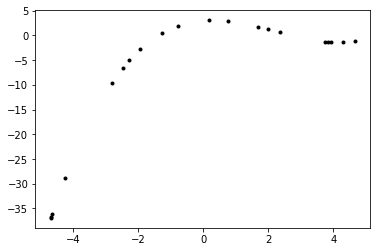

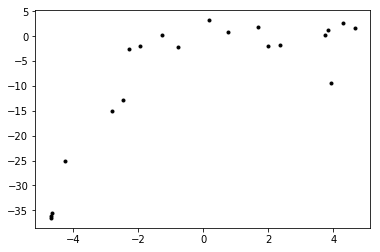

In [6]:
trainY = 3 + 0.5 * trainX - trainX**2 + 0.15 * trainX**3  # f(x)
plt.plot(trainX, trainY, 'k.')
plt.show()

trainY = trainY + (np.random.randn(trainY.size) * 3)     # noise

plt.plot(trainX, trainY, 'k.')
plt.show()

Adding the true function in, we can see better the noise term in action:

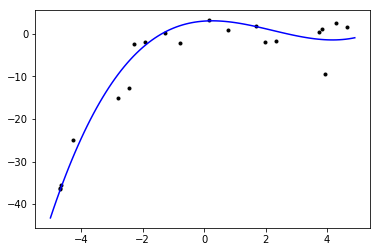

In [7]:
plt.plot(trainX, trainY, 'k.')
plt.plot(X, Y, 'b-')
plt.show()

**Yay! Step 1 complete!**

## Step 2: Linear Regression
---
For this, we'll need some *features* to make $\Phi$

- X data of the type we'd have as inputs
- We'll cheat and use polynomials of X

In [8]:
Phi = np.array([trainX ** p for p in range(6)]).T

Let's examine this a bit further.

To create a matrix in NumPy, use `np.array` on a sequence of sequences (rows):

E.g., the array

$$ A = \left[ \begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \end{array} \right] $$

is created with

In [9]:
A = np.array([[1,2,3],
              [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

We did:

In [16]:
Phi = np.array([trainX ** p for p in range(6)]).T
Phi

array([[ 1.00000000e+00, -2.80992943e+00,  7.89570341e+00,
        -2.21863694e+01,  6.23421323e+01, -1.75176992e+02],
       [ 1.00000000e+00, -4.69547541e+00,  2.20474893e+01,
        -1.03523444e+02,  4.86091784e+02, -2.28243202e+03],
       [ 1.00000000e+00, -1.27739860e+00,  1.63174719e+00,
        -2.08439157e+00,  2.66259888e+00, -3.40120009e+00],
       [ 1.00000000e+00, -4.65801897e+00,  2.16971407e+01,
        -1.01065693e+02,  4.70765915e+02, -2.19283656e+03],
       [ 1.00000000e+00,  3.92383627e+00,  1.53964911e+01,
         6.04133101e+01,  2.37051937e+02,  9.30152989e+02],
       [ 1.00000000e+00,  3.74417216e+00,  1.40188252e+01,
         5.24888950e+01,  1.96527459e+02,  7.35832642e+02],
       [ 1.00000000e+00,  3.82218071e+00,  1.46090654e+01,
         5.58384879e+01,  2.13424791e+02,  8.15748121e+02],
       [ 1.00000000e+00,  1.99323619e+00,  3.97299052e+00,
         7.91910849e+00,  1.57846537e+01,  3.14625430e+01],
       [ 1.00000000e+00, -4.68368573e+00,  2.193

Note the list comprehension applying exponentials to *ndarray* objects!

This generates rows of data which are powers of the training X inputs.

Finally, the `.T` at the end transposes the matrix so that these rows become columns as desired.

OK, we're ready to perform regression using OLS:

Remember, we want to obtain

$$ \mathbf{w} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y} $$

In [17]:
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ trainY


array([-15.01570966, -36.51354669,   0.20138881, -35.59752469,
        -9.37441536,   0.32052473,   1.18973517,  -1.91439062,
       -36.19040081,  -1.78898812,   1.60871205,   2.6266078 ,
        -1.98723904, -12.7673794 ,   3.20054324,  -2.2446748 ,
         0.84445268, -25.00998978,  -2.48277814,   1.87008356])

Not bad!  Remember, our true coefficients are 3, 0.5, -1, 0.15 and zeroes for the rest.

## Step 3: Plot Results
---
Let's use our learned weights to estimate (predict) Y across our range:

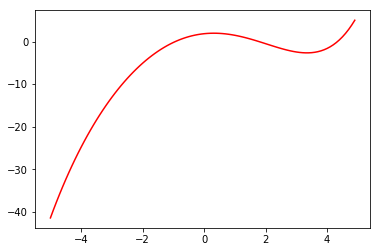

In [12]:
Yhat = np.array([X ** p for p in range(6)]).T @ w
plt.plot(X, Yhat, 'r-')
plt.show()

Looks promising!  Let's see it against the sample data and the true function: 

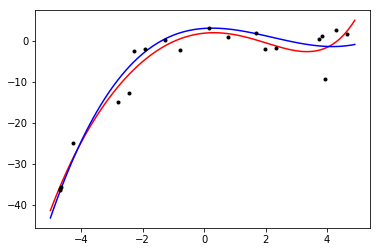

In [13]:
plt.plot(X, Yhat, 'r-', X, Y, 'b-', trainX, trainY, 'k.')
plt.show()

## Next Steps
---
In the next lecture, we'll:
- We will continue exploring a few more machine learning concepts using our example
- Talk more about NumPy